# 1. Chargement et Exploration des Données




In [7]:
# Import les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
BASE_PATH = '/content/drive/MyDrive/NB15'

In [9]:
# Chargement du train dataset UNSW-NB15 et Aperçu des premières lignes
train_data=pd.read_csv(BASE_PATH + '/UNSW_NB15_training-set.csv')
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [10]:
# Chargement du test dataset UNSW-NB15 et Aperçu des premières lignes
test_data=pd.read_csv(BASE_PATH + '/UNSW_NB15_testing-set.csv')
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [11]:
# Chargement du features de UNSW-NB15 et Aperçu des premières lignes
features=pd.read_csv(BASE_PATH + '/NUSW-NB15_features.csv', encoding='latin1')
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [12]:
# concatener train et test dataset UNSW-NB15
merge_ordered_data = pd.concat([train_data, test_data], ignore_index=True)
merge_ordered_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [13]:

# Dimensions du dataset
print("Dimensions du dataset :", merge_ordered_data.shape)

Dimensions du dataset : (257673, 45)


In [14]:
# Statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives pour les colonnes numériques :")
merge_ordered_data.describe()

Statistiques descriptives pour les colonnes numériques :


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [15]:
# Compter les valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
missing_values = merge_ordered_data.isnull().sum()
print(missing_values[missing_values > 0])

Nombre de valeurs manquantes par colonne :
Series([], dtype: int64)


In [16]:
# Liste des colonnes et leurs types de données
print("\nTypes de données et informations sur chaque colonne :")
merge_ordered_data.info()


Types de données et informations sur chaque colonne :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 

In [17]:
#Vérification des différentes valeurs de la colonne cible label
merge_ordered_data['label'].value_counts()

,count
label,
1,164673
0,93000


In [18]:
#Vérification des différentes valeurs de la colonne state
merge_ordered_data['state'].value_counts()

,count
state,
FIN,117164
INT,116438
CON,20134
REQ,3833
RST,84
ECO,12
ACC,4
CLO,1
PAR,1


In [19]:
#Vérification des différentes valeurs de la colonne proto
merge_ordered_data['proto'].value_counts()

,count
proto,
tcp,123041
udp,92701
unas,15599
arp,3846
ospf,3271
...,...
netblt,131
rdp,131
igmp,48


In [20]:
#Vérification des différentes valeurs de la colonne attack_cat
merge_ordered_data['attack_cat'].value_counts()

,count
attack_cat,
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511


In [21]:
#Vérification des différentes valeurs de la colonne service
merge_ordered_data.value_counts('service')

,count
service,
-,141321
dns,68661
http,27011
smtp,6909
ftp-data,5391
ftp,4980
pop3,1528
ssh,1506
dhcp,120


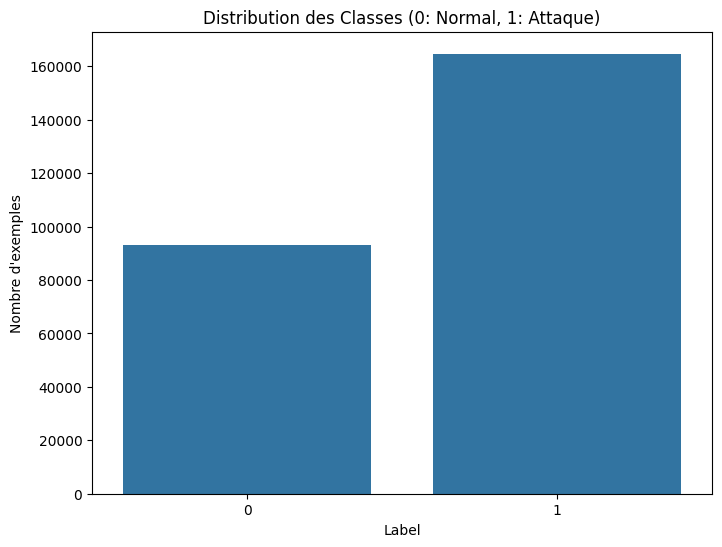

In [22]:
# Distribution des classes (label)
plt.figure(figsize=(8, 6))
sns.countplot(data=merge_ordered_data, x='label')
plt.title("Distribution des Classes (0: Normal, 1: Attaque)")
plt.xlabel("Label")
plt.ylabel("Nombre d'exemples")
plt.show()

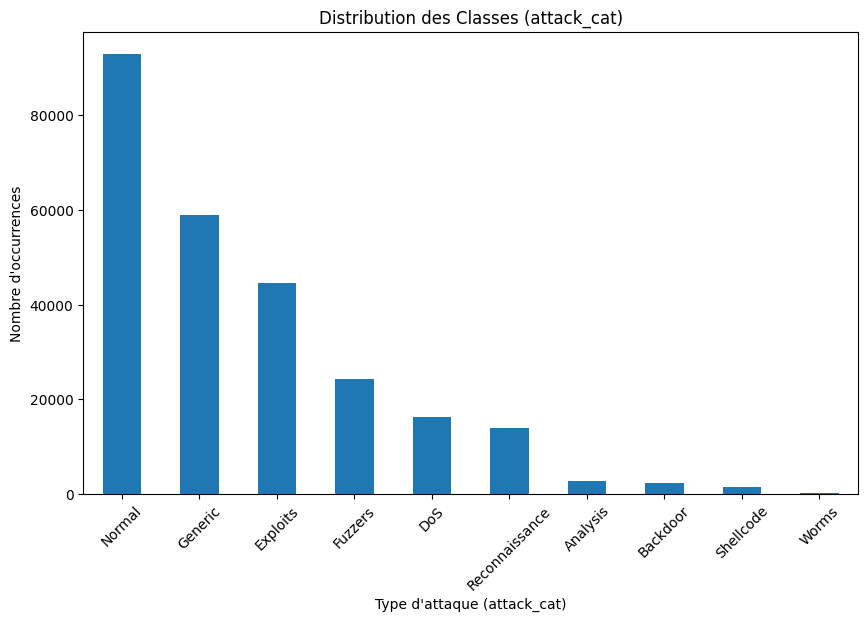

In [23]:
# Distribution des classes dans la colonne 'attack_cat'
plt.figure(figsize=(10, 6))
merge_ordered_data['attack_cat'].value_counts().plot(kind='bar')
plt.xlabel("Type d'attaque (attack_cat)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des Classes (attack_cat)")
plt.xticks(rotation=45)
plt.show()

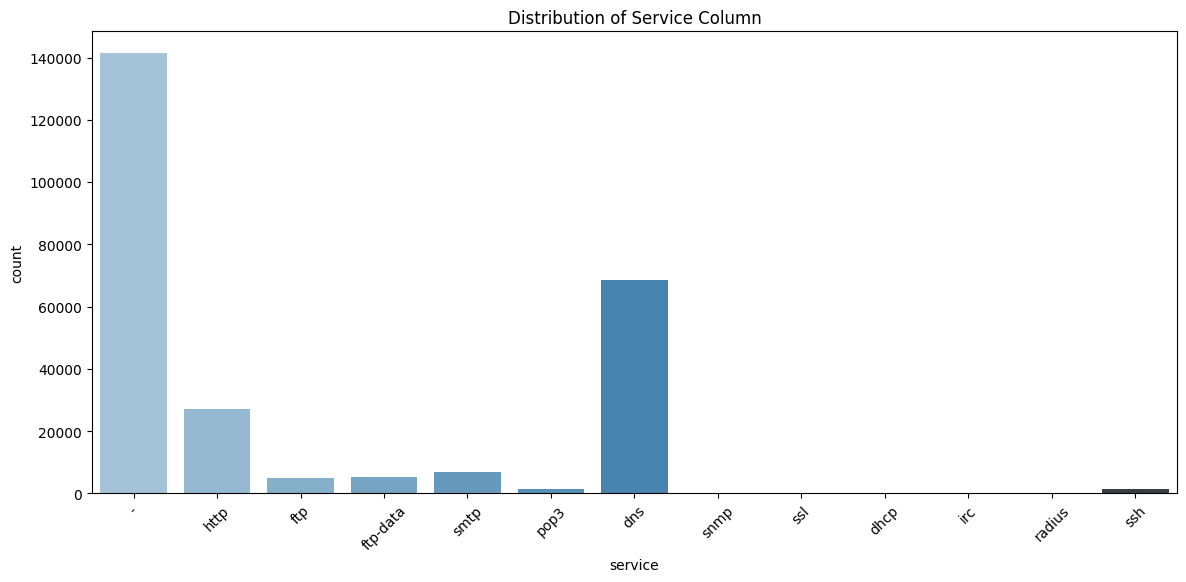

In [24]:
# Représenter la colonne de service
plt.figure(figsize=(14, 6))
sns.countplot(x='service', hue='service' , palette="Blues_d", data=merge_ordered_data)
plt.title('Distribution of Service Column')
plt.xticks(rotation=45)
plt.show()

# 2. Prétraitement des Données




## Nettoyage des Données







In [25]:
# Remplacer toutes les occurrences de '-' par NaN
merge_ordered_data = merge_ordered_data.replace('-', np.nan)

In [26]:
# Supprimer les lignes avec des NaN dans la colonne 'service'
merge_ordered_data = merge_ordered_data.dropna(subset=['service'])
merge_ordered_data.value_counts('service')

,count
service,
dns,68661
http,27011
smtp,6909
ftp-data,5391
ftp,4980
pop3,1528
ssh,1506
dhcp,120
snmp,109


## Encodage des Variables Catégorielles avec Label Encoding


In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialisation d'un dictionnaire pour stocker le mapping des étiquettes pour chaque colonne
label_mappings = {}

# Liste des colonnes à encoder
cat_columns = ['proto', 'service', 'state','attack_cat']

# Appliquer le Label Encoding à chaque colonne catégorielle
for col in cat_columns:
    label_encoder = LabelEncoder()
    merge_ordered_data[f'{col}_numeric'] = label_encoder.fit_transform(merge_ordered_data[col])

    # Sauvegarder le mapping pour chaque colonne
    label_mappings[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Affichage des mappings pour chaque colonne
print("Mapping des catégories pour chaque colonne :")
for col, mapping in label_mappings.items():
    print(f"\nMapping pour '{col}' :")
    for category, number in mapping.items():
        print(f"{number} : {category}")


Mapping des catégories pour chaque colonne :

Mapping pour 'proto' :
0 : tcp
1 : udp

Mapping pour 'service' :
0 : dhcp
1 : dns
2 : ftp
3 : ftp-data
4 : http
5 : irc
6 : pop3
7 : radius
8 : smtp
9 : snmp
10 : ssh
11 : ssl

Mapping pour 'state' :
0 : ACC
1 : CON
2 : FIN
3 : INT
4 : REQ
5 : RST

Mapping pour 'attack_cat' :
0 : Analysis
1 : Backdoor
2 : DoS
3 : Exploits
4 : Fuzzers
5 : Generic
6 : Normal
7 : Reconnaissance
8 : Worms


In [28]:
# Suppression des colonnes d'origine maintenant encodées
merge_ordered_data = merge_ordered_data.drop(columns=['proto', 'service', 'state','attack_cat'])

In [29]:
# Vérification de l'Encodage des Variables Catégorielles et la suppression des colonnes
merge_ordered_data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_numeric,service_numeric,state_numeric,attack_cat_numeric
35,36,0.983874,10,8,816,1172,17.278635,62,252,5976.375000,...,0,1,1,3,0,0,0,4,2,6
40,41,1.535254,10,10,826,1266,12.375802,62,252,3876.882812,...,0,1,1,3,0,0,0,4,2,6
45,46,1.059359,10,8,830,1134,16.047441,62,252,5641.147461,...,0,1,3,1,0,0,0,4,2,6
49,50,0.990548,10,10,804,1414,19.181301,62,252,5847.268066,...,0,1,1,2,0,0,0,4,2,6
72,73,1.303518,12,8,898,1120,14.575939,62,252,5057.083984,...,0,1,2,1,0,0,0,4,2,6


## Normalisation des caractéristiques numériques

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Initialisation du scaler Min-Max
scaler = MinMaxScaler()

# Sélection des colonnes numériques, en excluant 'proto', 'service', 'state', 'label', et 'attack_cat'
columns_to_normalize = merge_ordered_data.select_dtypes(include=np.number).columns.difference(['proto_numeric', 'service_numeric', 'state_numeric', 'label', 'attack_cat_numeric'])

# Application de la normalisation Min-Max aux colonnes numériques sélectionnées
merge_ordered_data[columns_to_normalize] = scaler.fit_transform(merge_ordered_data[columns_to_normalize])


In [31]:
# Vérification la Normalisation
merge_ordered_data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_numeric,service_numeric,state_numeric,attack_cat_numeric
35,0.000183,0.016398,0.000845,0.000726,0.000052,0.000080,0.000017,0.138393,0.992126,0.000003,...,0.0,0.033333,0.000000,0.034483,0.0,0,0,4,2,6
40,0.000211,0.025588,0.000845,0.000908,0.000053,0.000086,0.000012,0.138393,0.992126,0.000002,...,0.0,0.033333,0.000000,0.034483,0.0,0,0,4,2,6
45,0.000240,0.017656,0.000845,0.000726,0.000053,0.000077,0.000016,0.138393,0.992126,0.000002,...,0.0,0.033333,0.033898,0.000000,0.0,0,0,4,2,6
49,0.000262,0.016509,0.000845,0.000908,0.000051,0.000096,0.000019,0.138393,0.992126,0.000003,...,0.0,0.033333,0.000000,0.017241,0.0,0,0,4,2,6
72,0.000394,0.021725,0.001033,0.000726,0.000058,0.000076,0.000015,0.138393,0.992126,0.000002,...,0.0,0.033333,0.016949,0.000000,0.0,0,0,4,2,6


## Visualisation avec Matrix de Correlation
 pour eviter de tomber sur des caractéristiques sont fortement corrélées entre elles.




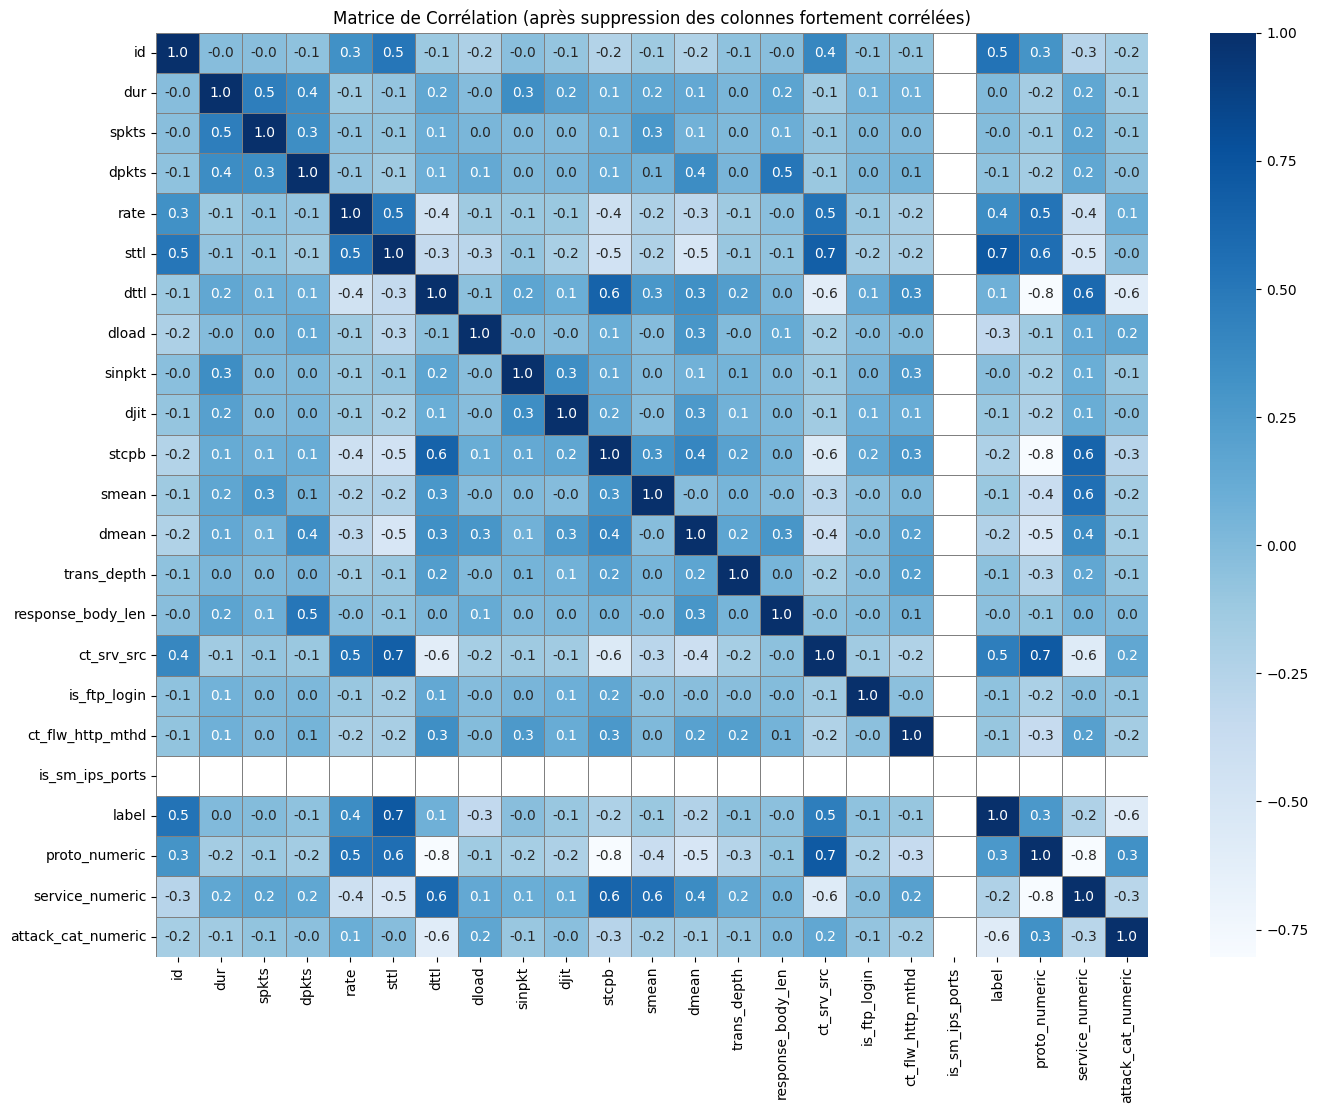

Colonnes supprimées pour réduire la redondance :
['sbytes', 'dbytes', 'sload', 'sloss', 'dloss', 'dinpkt', 'sjit', 'swin', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'state_numeric']


In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = merge_ordered_data.corr()

# Garder uniquement la partie supérieure de la matrice de corrélation pour éviter les doublons
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identifier les colonnes avec une corrélation élevée (supérieure à 0.8)
highly_correlated_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)
]

# Supprimer la colonne cible 'label'
if len(highly_correlated_features) > 0:
    highly_correlated_features.remove('label')

# Suppression des colonnes fortement corrélées dans le DataFrame pour optimiser les performances
merge_ordered_data.drop(columns=highly_correlated_features, inplace=True)

# Affichage de la nouvelle matrice de corrélation après suppression des colonnes redondantes
plt.figure(figsize=(16, 12))
sns.heatmap(merge_ordered_data.corr(), annot=True, cmap='Blues', fmt=".1f", linewidths=0.5, linecolor='gray')
plt.title("Matrice de Corrélation (après suppression des colonnes fortement corrélées)")
plt.show()

# Afficher la liste des colonnes supprimées
print("Colonnes supprimées pour réduire la redondance :")
print(highly_correlated_features)


# 3. Construction et Entraînement des Modèles

# Partie 1 : Modèles de Détection d'Attaque (Binaire) .
Dans ce modèle, nous allons classifier les données en trafic normal (0) ou malveillant (1).

## Utilisation de Random Forest Classifier

In [33]:
# Import des Bibliothèques Nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Préparation des Données pour le Modèle 1

In [34]:

# Définir les caractéristiques et la variable cible pour le Modèle 1
X_model1 = merge_ordered_data.drop(columns=['label', 'attack_cat_numeric'],axis =1)
y_model1 = merge_ordered_data['label']  # Classe cible pour la détection d'attaque

# Séparation des données en ensembles d'entraînement et de test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y_model1, test_size=0.2, random_state=42)


Entraînement du Modèle avec Random Forest :

In [35]:
# Initialisation et entraînement du modèle Random Forest
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

Évaluation des Performances:

Rapport de classification pour la détection d'attaque :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5821
           1       1.00      1.00      1.00     17450

    accuracy                           0.99     23271
   macro avg       0.99      0.99      0.99     23271
weighted avg       0.99      0.99      0.99     23271



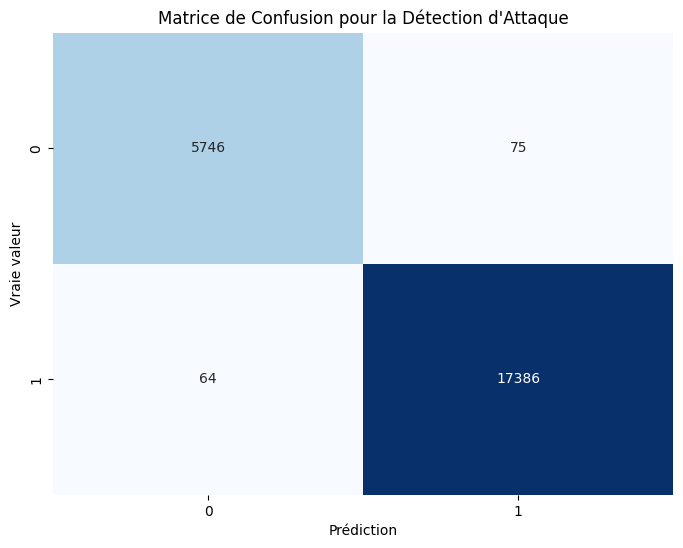

In [36]:
# Prédiction sur l'ensemble de test
y_pred1 = model1.predict(X_test1)

# Évaluation des performances du modèle
print("Rapport de classification pour la détection d'attaque :")
print(classification_report(y_test1, y_pred1))

# Calcul de la matrice de confusion pour le modèle 1
conf_matrix = confusion_matrix(y_test1, y_pred1)
# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de Confusion pour la Détection d'Attaque")
plt.show()


## Utilisation de Gradient Boosting Classifier
Gradient Boosting est un puissant algorithme d'ensemble qui peut améliorer la précision sur des ensembles de données non linéaires.

In [37]:
#Import des Bibliothèques
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

Entraînement du Modèle avec Gradient Boosting :

In [39]:
# Initialisation et entraînement du modèle Gradient Boosting
model_gb1 = GradientBoostingClassifier(random_state=42)
model_gb1.fit(X_train1, y_train1)

GradientBoostingClassifier(random_state=42)

Évaluation du Modèle :

Rapport de classification pour la détection d'attaque avec Gradient Boosting :
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5821
           1       0.99      0.99      0.99     17450

    accuracy                           0.99     23271
   macro avg       0.99      0.98      0.99     23271
weighted avg       0.99      0.99      0.99     23271



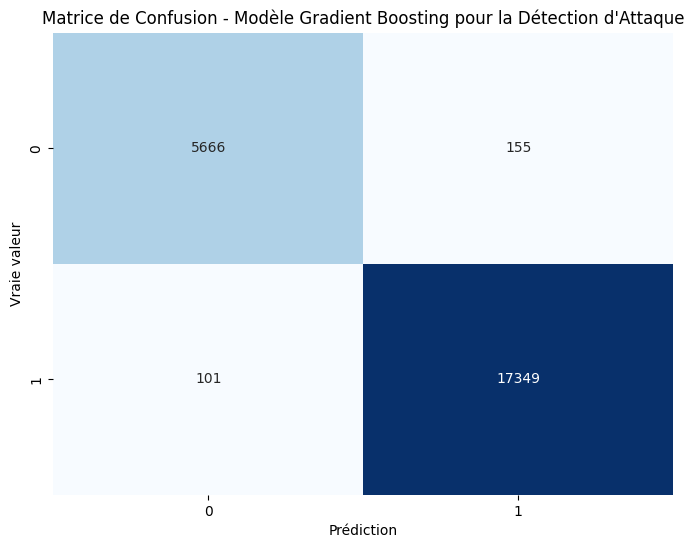

In [40]:
# Prédiction sur l'ensemble de test
y_pred_gb1 = model_gb1.predict(X_test1)

# Évaluation des performances
print("Rapport de classification pour la détection d'attaque avec Gradient Boosting :")
print(classification_report(y_test1, y_pred_gb1))

# Matrice de confusion
conf_matrix_gb1 = confusion_matrix(y_test1, y_pred_gb1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de Confusion - Modèle Gradient Boosting pour la Détection d'Attaque")
plt.show()


# Partie 2 : Modèles de Classification du Type d'Attaque
Ce modèle est destiné à identifier le type d'attaque lorsqu'une intrusion est détectée.

## Utilisation de Random Forest Classifier

Préparation des Données pour le Modèle 2

In [41]:

# Définir les caractéristiques et la variable cible pour le Modèle 2
X_model2 = merge_ordered_data.drop(columns=['attack_cat_numeric'])  # Supprimer la cible
y_model2 = merge_ordered_data['attack_cat_numeric']  # Classe cible pour le type d'attaque

# Séparation des données en ensembles d'entraînement et de test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)


Entraînement du Modèle avec Random Forest

In [42]:
# Initialisation et entraînement du modèle Random Forest pour la classification du type d'attaque
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train2, y_train2)


RandomForestClassifier(random_state=42)

Évaluation des Performances

Rapport de classification pour la détection du type d'attaque :
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.89      0.36      0.52        22
           2       0.72      0.33      0.45       530
           3       0.86      0.94      0.90      4375
           4       0.94      0.92      0.93       425
           5       1.00      0.99      1.00     11506
           6       1.00      1.00      1.00      5821
           7       0.59      0.53      0.56       463
           8       0.58      0.29      0.39        24

    accuracy                           0.96     23271
   macro avg       0.82      0.68      0.72     23271
weighted avg       0.96      0.96      0.95     23271



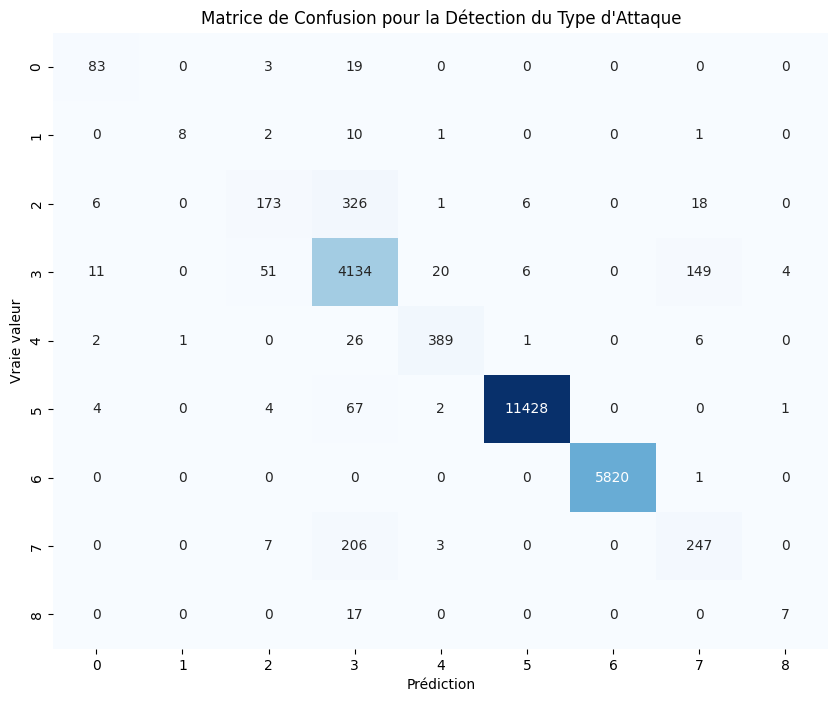

In [43]:
# Prédiction sur l'ensemble de test
y_pred2 = model2.predict(X_test2)

# Évaluation des performances du modèle
print("Rapport de classification pour la détection du type d'attaque :")
print(classification_report(y_test2, y_pred2))

# Calcul de la matrice de confusion
conf_matrix2 = confusion_matrix(y_test2, y_pred2)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de Confusion pour la Détection du Type d'Attaque")
plt.show()


## Utilisation de Support Vector Machine (SVM)
SVM est souvent performant pour les classifications multi-classes lorsqu'il est bien optimisé, bien que cela puisse augmenter le temps de calcul.


In [44]:
#Import des Bibliothèques :
from sklearn.svm import SVC


Entraînement du Modèle avec SVM :

In [45]:
# Initialisation et entraînement du modèle SVM
model_svm2 = SVC(kernel='linear', random_state=42)  # Utiliser un noyau linéaire ou RBF selon le besoin
model_svm2.fit(X_train2, y_train2)


SVC(kernel='linear', random_state=42)

Évaluation du Modèle :

Rapport de classification pour la détection du type d'attaque avec SVM :
              precision    recall  f1-score   support

           0       0.93      0.27      0.41       105
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00       530
           3       0.76      0.98      0.86      4375
           4       0.77      0.57      0.66       425
           5       1.00      0.99      0.99     11506
           6       1.00      1.00      1.00      5821
           7       0.72      0.03      0.05       463
           8       0.00      0.00      0.00        24

    accuracy                           0.94     23271
   macro avg       0.58      0.43      0.44     23271
weighted avg       0.92      0.94      0.92     23271



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


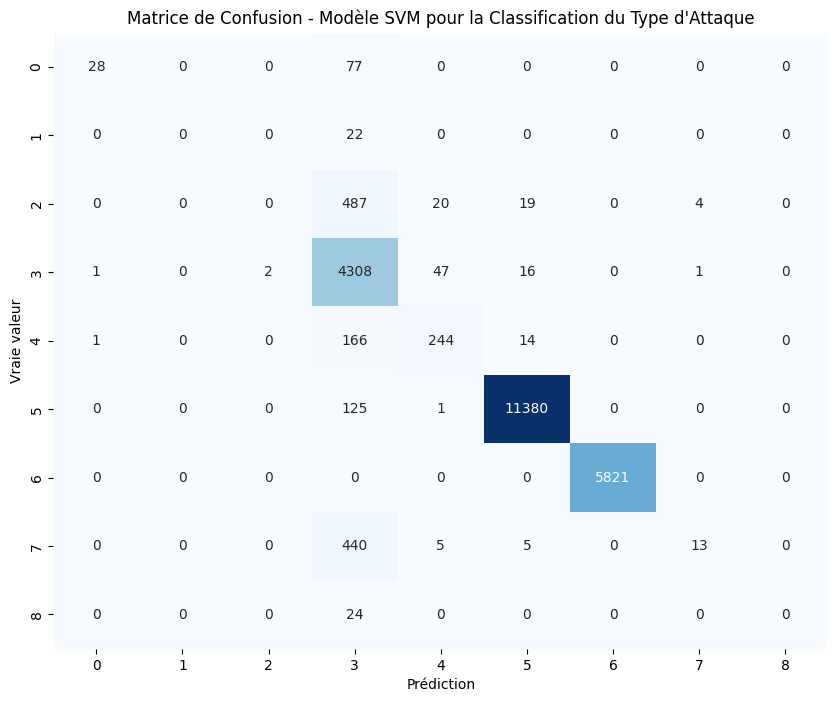

In [46]:
# Prédiction sur l'ensemble de test
y_pred_svm2 = model_svm2.predict(X_test2)

# Évaluation des performances
print("Rapport de classification pour la détection du type d'attaque avec SVM :")
print(classification_report(y_test2, y_pred_svm2))

# Matrice de confusion
conf_matrix_svm2 = confusion_matrix(y_test2, y_pred_svm2)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de Confusion - Modèle SVM pour la Classification du Type d'Attaque")
plt.show()
